# HW1 Part 2 - MGT 6203

## Instructions:

**For the rest of the semester, we will be using Vocareum to work on and submit your homework assignments. Vocareum is a cloud platform for programming classes. It provides an infrastructure that allows us to move the educational aspects like assignments, exams, quizzes, etc, to the cloud. The merit of this platform is that all of you will be working in the same coding environment. This way we can eliminate many issues we might encounter when working on an individual basis, such as those with library installations and RStudio malfunctions. Some you you might be new to this platform, here we provided a few things to keep in mind to get you started, please try to read through them.**

**Things to keep in mind:**


<ol>
<li>Even though we are moving from your local envrionment to the cloud, **our expectations from your homework will stay the same**. Same goes for the rubrics.</li>

<li>Vocareum has its own cloud based file system, the data files you will be using for the assignments will be stored in the cloud with path **"../resource/asnlib/publicdata/FILENAME.csv"**. You will be able to import them with the same method as you do in RStudio, simply substitute the path name to the one specified in the instructions. You won't be able to modify these data files.</li>

<li>You will be able to find the data files on Canvas/EdX if you would like to explore them offline.</li>

<li>**For coding questions, you will be graded on the R code as well as the output** in your submission.</li>

<li>**For interpretations or short response questions, please type the answers in the notebook's markdown cells**. To change a code cell to a markdown cell, click on the cell, and in the dropdown menu above, switch the type of the cell block from "code" to "markdown". **Adding print statements to code cells for short response/interpretation questions is also fine, as long as we can clearly see the output of your response**.</li>

<li>You don't need to, but if you would like to learn more about how to format your markdown cells, visit the following site: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/. Jupyter notebook also support LaTeX.</li>

<li>**Feel free to add as many additional cells as you need**. But please keep your solution to a question directly under that question to aviod confusions.</li>

<li>You may delete the #SOLUTION BEGINS/ENDS HERE comments from the cell blocks, they are just pointers that indicates where to put you solutions.</li>

<li>When you have finished the assignment, remember to rerun your notebook to check if it runs correctly. You can do so by going to **Kernel-> Restart & Run All**. You may lose points if your solutions does not run successfully.</li>

<li>**Click the "Submit" button on the top right corner to turn in your assignment**. Your assignment will enter the next phase for peer review.</li>

<li>You will be able to come back and resubmit your assignment as long as it is before the start of the peer review period.</li>

</ol>



# About Package Installation:

Most of the packages (if not all) that you will need to complete this assignment are already installed in this environment. An easy way to check this is to run the command: library(PackageName). If this command runs successfully then the package was already installed and has been successfully attached to the code. If the command gave an error saying the Package was not found then follow the steps below to successfully install the package and attach it to the code: 

Use *installed.packages()* command to return a table of the packages that are preinstalled in the environment.

To attach a preinstalled library in Vocareum, simply use *library(PackageName)*

**To install a package that does not come with the provided environment, please use the following syntax:**

*install.packages("PackageName", lib="../work/")*

**To attach a library you just installed, use the following syntax:**

*library(PackageName, lib.loc="../work/")*

Make sure the file location is the same as the above code snippets *("../work/")*

## Q1. Use the *"airbnb_data.csv"* provided and answer the following questions on Linear Regression:

**Instruction: The file "airbnb_data.csv" can be accessed at the path: ("../resource/asnlib/publicdata/airbnb_data.csv")**

a)  Remove ‘id’columns (‘room_id’, ‘survey_id’, ‘host_id’) and ‘city’ from your dataset, and fit a multiple linear regression model using price as the response variable and all others as predictor variables.  (Note: Do not fit a model using id columns and city as predictors). Which variables are statistically significant at a 95% confidence interval.    (6 points)

In [3]:
# SOLUTION BEGINS HERE

#import data
df1 <- read.csv("../resource/asnlib/publicdata/airbnb_data.csv", header=TRUE, stringsAsFactors = TRUE)
#print(df1)

#Remove columns
df2 <- subset(df1, select=-c(room_id, survey_id, host_id, city))
#print(df2)

#Fit a multiple linear regression model using price as the response variable and all others as predictor variables
df2mlr <- lm(price ~ room_type + reviews + overall_satisfaction + accommodates + bedrooms, data=df2)

#Summary of model
summary(df2mlr)
# SOLUTION ENDS HERE


Call:
lm(formula = price ~ room_type + reviews + overall_satisfaction + 
    accommodates + bedrooms, data = df2)

Residuals:
   Min     1Q Median     3Q    Max 
-367.8  -49.2    3.2   38.6 4032.7 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -23.36172   21.88618  -1.067  0.28609    
room_typePrivate room  -0.93115   13.21827  -0.070  0.94386    
room_typeShared room  -76.66780   59.90939  -1.280  0.20099    
reviews                 0.01090    0.09982   0.109  0.91310    
overall_satisfaction  -10.48160    3.47320  -3.018  0.00262 ** 
accommodates           23.00721    5.23952   4.391 1.27e-05 ***
bedrooms               85.64533   11.45983   7.474 1.95e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 167.1 on 847 degrees of freedom
Multiple R-squared:  0.3228,	Adjusted R-squared:  0.318 
F-statistic:  67.3 on 6 and 847 DF,  p-value: < 2.2e-16


b) Interpret the coefficients for predictors: 'room_type', 'bedrooms'. (3 points)

In [4]:
# SOLUTION BEGINS HERE

#The Coefficient for the predictor 'room_typeShared room' is -76.66780. Thus, the price will decrease by $76.67 when a room is shared 
#compared to the base case of an Entire home/apt.

#The Coefficient for the predictor 'room_typePrivate room' is -0.93115. Thus, the price will decrease by 93 cents when a room is
#private compared to the base case of an Entire home/apt.

#The Coefficient for the predictor 'bedrooms' is 85.64533. Thus, an increase of 1 bedroom will result in an increase price of
#$85.65.


# SOLUTION ENDS HERE

c) Predict the price (nearest dollar) for a listing with the following factors: 'bedrooms' = 1, 'accommodates' = 2, 'reviews' = 70, 'overall_satisfaction' = 4, and 'room_type' = 'Private room'. (6 points)



|bedrooms|accomodates|reviews|overall_satisfaction|room_type|
|------|------|------|-------|------|------|
|1|2|70|4|Private room|


In [5]:
# SOLUTION BEGINS HERE

#Create listing with the following factors: 'bedrooms' = 1, 'accommodates' = 2, 'reviews' = 70, 'overall_satisfaction' = 4, and 'room_type' = 'Private room'. 
prediction1 <- data.frame(bedrooms = c(1), accommodates = c(2), reviews = c(70), overall_satisfaction=c(4), room_type = c("Private room"))

#Make prediction and round it
round(predict(df2mlr, prediction1),0)
# SOLUTION ENDS HERE

1 
66

d) Identify outliers using Cook's distance approach. Remove points having Cook's distance > 1. Rerun the model after the removal of these points and print the summary. (6 points)

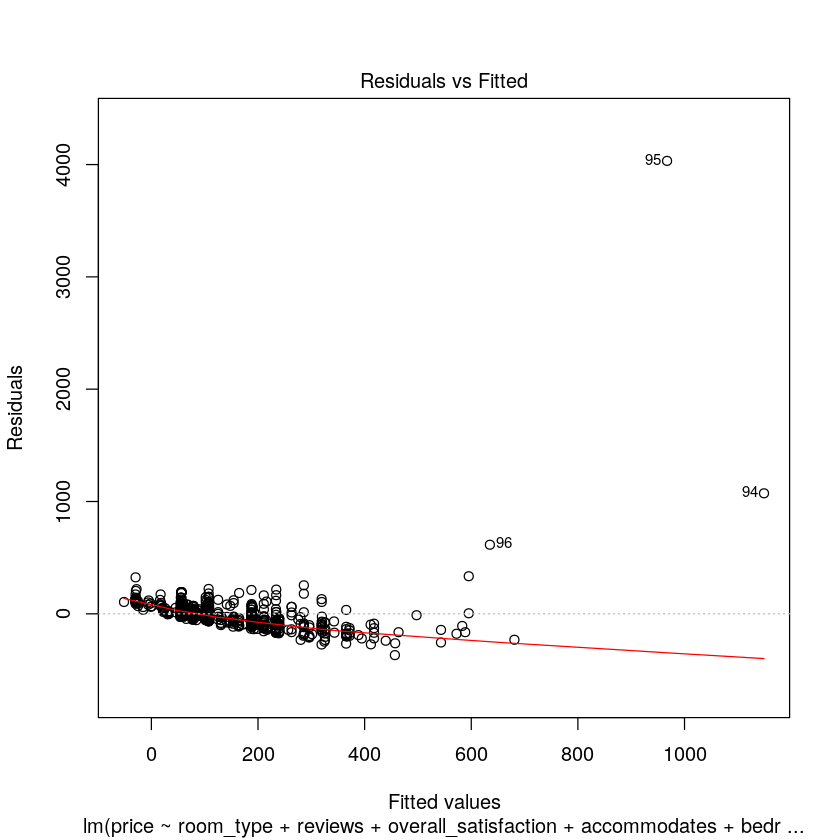

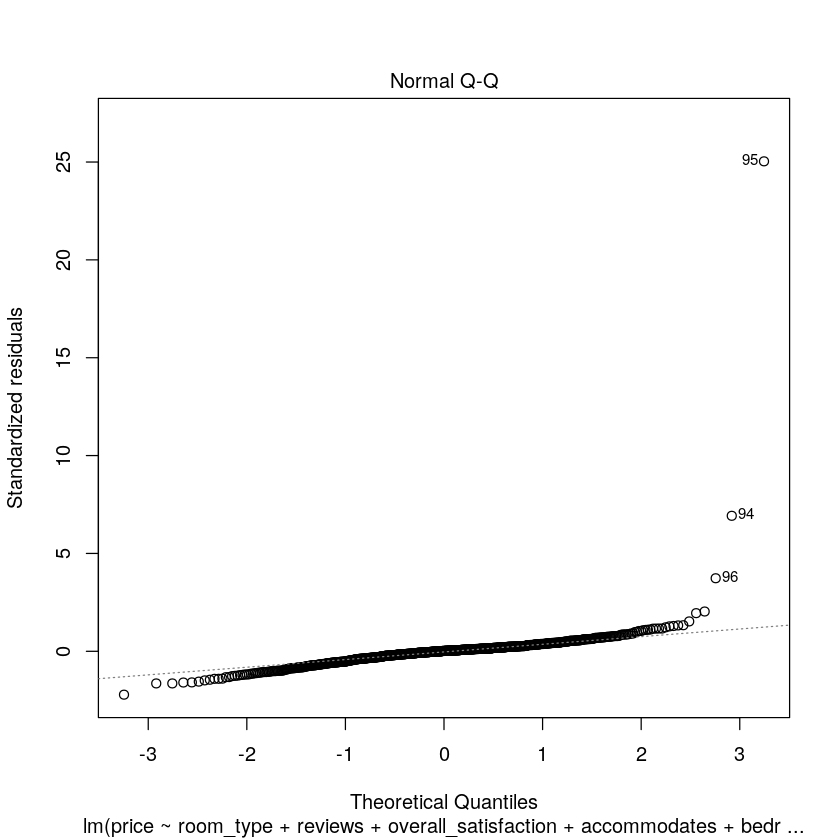

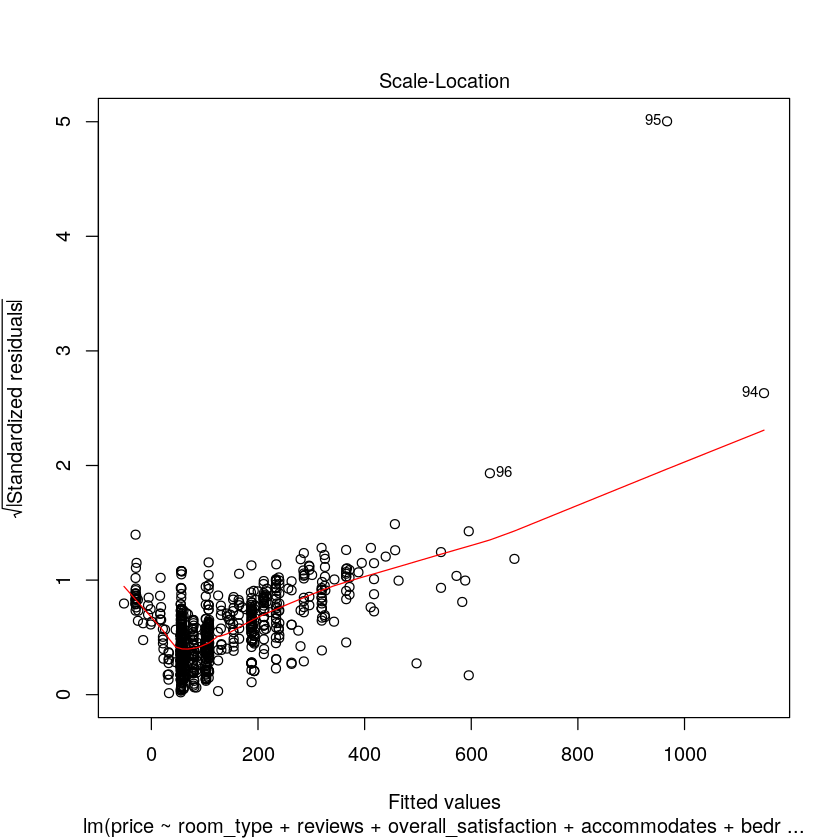

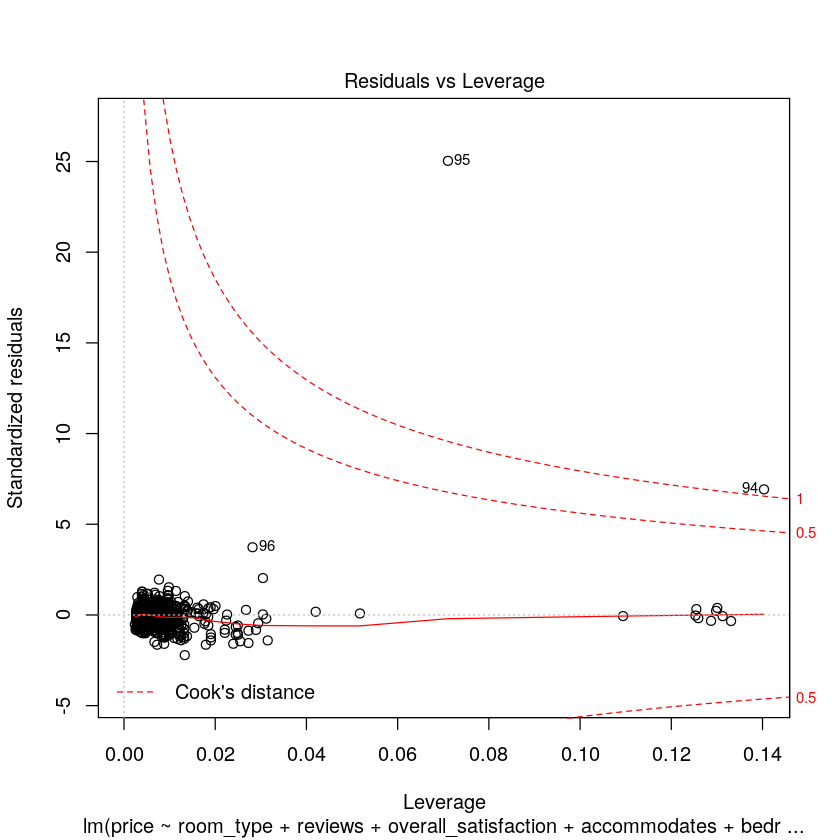

In [6]:
# SOLUTION BEGINS HERE

#plot data to Identify outliers using Cook's distance approach
plot(df2mlr)
# SOLUTION continues onto the next cell

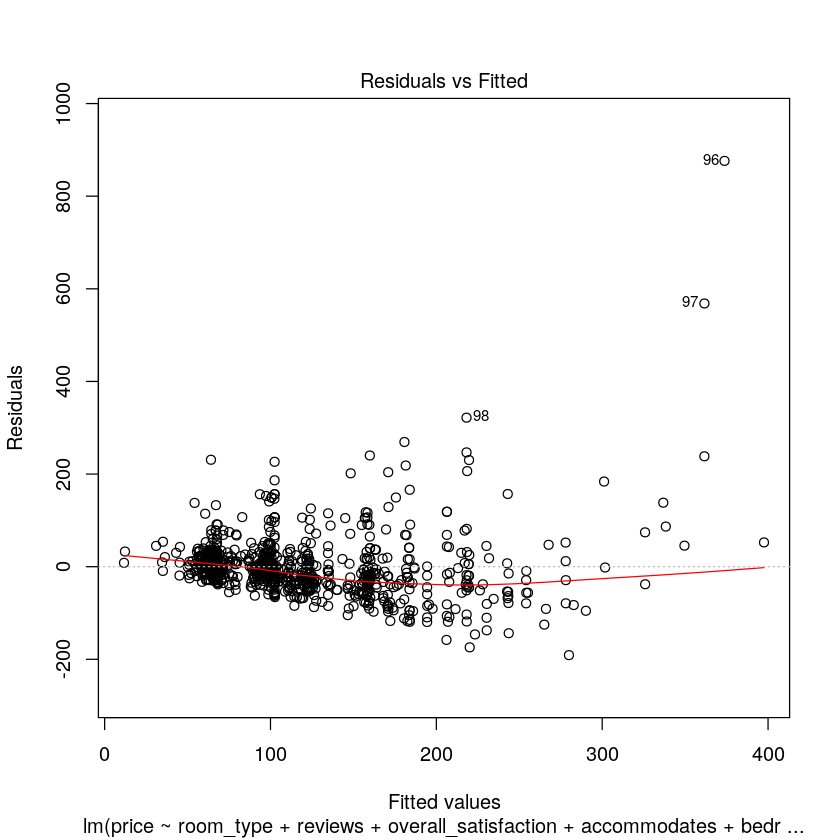

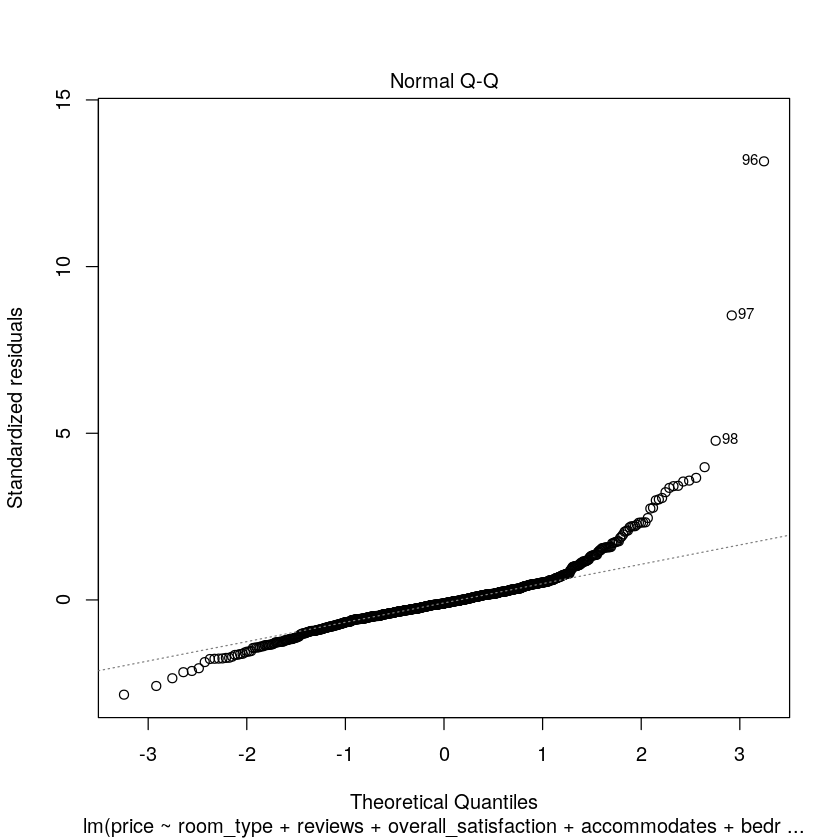

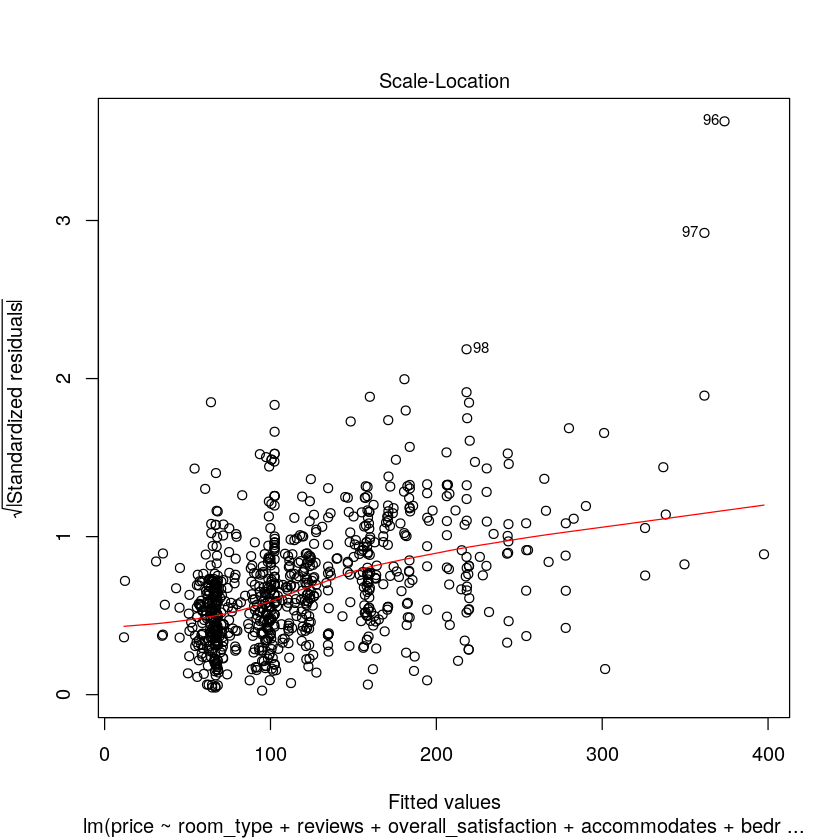

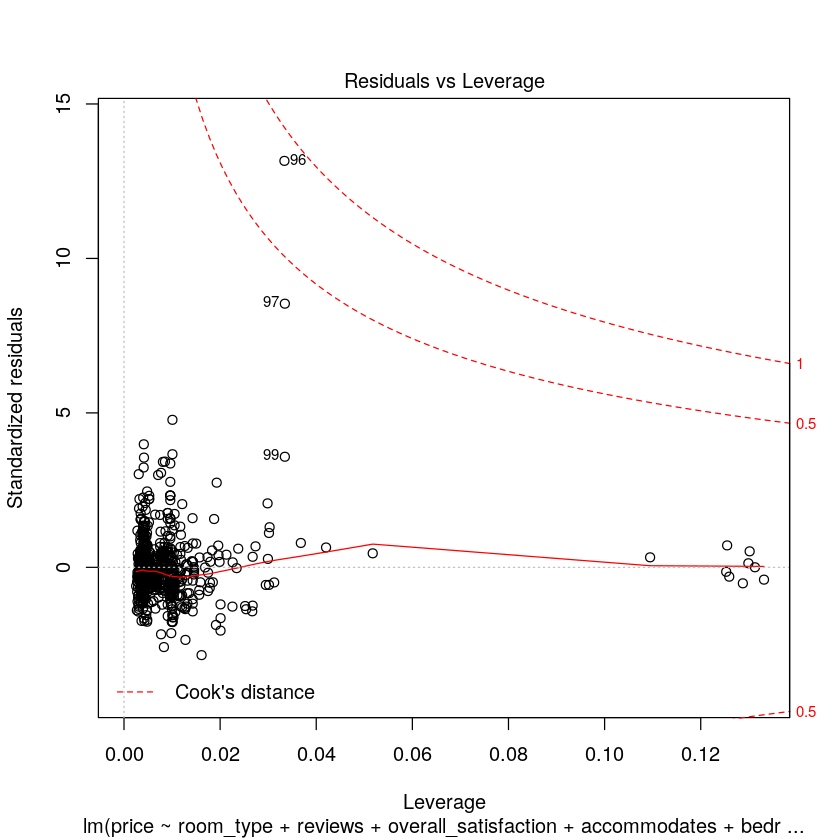

In [7]:
#A rule of thumb for Cook's distance is to identify points with Ci>1 as highly influential.
#Based on the threshold of 1 from the Residuals vs Leverage graph, points 94 and 95 are outliers. 

#remove outliers
df3 <- df2[-c(94,95),]

#fit a multiple linear regression model using price as the response variable and all others as predictor variables
df3mlr <- lm(price ~ room_type  + reviews + overall_satisfaction + accommodates + bedrooms, data = df3)

#Plot new model without outliers
plot(df3mlr)

# SOLUTION ENDS HERE

In [8]:
#Summary of new model without outliers
summary(df3mlr)


Call:
lm(formula = price ~ room_type + reviews + overall_satisfaction + 
    accommodates + bedrooms, data = df3)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.95  -32.43   -7.09   20.35  876.26 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            75.01310    9.09152   8.251 6.01e-16 ***
room_typePrivate room -32.28201    5.38034  -6.000 2.92e-09 ***
room_typeShared room  -91.69951   24.28958  -3.775 0.000171 ***
reviews                -0.05915    0.04047  -1.462 0.144202    
overall_satisfaction   -6.78957    1.41118  -4.811 1.78e-06 ***
accommodates           11.90698    2.14267   5.557 3.68e-08 ***
bedrooms               35.93177    4.87968   7.364 4.25e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.73 on 845 degrees of freedom
Multiple R-squared:  0.4249,	Adjusted R-squared:  0.4208 
F-statistic:   104 on 6 and 845 DF,  p-value: < 2.2e-16


e) Create another multiple linear regression model by removing the 'id' columns ('room_id', 'survery_id', 'host_id'), 'city', and 'room_type' from the Airbnb_data.csv dataset, run the vif function and calculate the vif value of the variable 'bedrooms'. (3 points)

In [9]:
#install vif function
library(car)

Loading required package: carData


In [10]:
# SOLUTION BEGINS HERE

#Remove the 'id' columns ('room_id', 'survery_id', 'host_id'), 'city', and 'room_type' from the Airbnb_data.csv dataset
df4 <- subset(df1, select=-c(room_id, survey_id, host_id, city, room_type))

#Create another multiple linear regression model
df4mlr <- lm(price ~ reviews + overall_satisfaction + accommodates + bedrooms, data=df2)



#run vif function
vif(df4mlr)

# SOLUTION ENDS HERE

reviews overall_satisfaction         accommodates 
            1.136063             1.129636             2.761613 
            bedrooms 
            2.759746

## Q2. Use the *"direct_marketing.csv"* provided and answer the following questions on Linear Regression:

**Create indicator variables for the 'History' column. Considering the base case as None (i.e., create Low, Medium and High variables with 1 denoting the positive case and 0 the negative) and few additional variables LowSalary, MediumSalary and HighSalary based on the customer history type i.e., MediumSalary = Medium*Salary etc.**

**Instruction: The dataset "direct_marketing.csv" can be accessed at the path: ("../resource/asnlib/publicdata/direct_marketing.csv")**


a) Fit a multiple linear regression model using 'AmountSpent' as the response variable and the indicator variables along with their salary variables as the predictors: (6 points)

$$AmountSpent = \beta_0 + \beta_1Salary + \beta_2Low + \beta_3Medium + \beta_4High + \beta_5LowSalary + \beta_6MediumSalary + \beta_7HighSalary$$

In [11]:
#Install Library
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
# SOLUTION BEGINS HERE

#import data
dm <- read.csv("../resource/asnlib/publicdata/direct_marketing.csv", header = TRUE, stringsAsFactors = TRUE)
print(dm)

#transformation data
dm <- dm %>%
mutate(Low = ifelse(History == "Low", 1, 0)) %>%
mutate(Medium = ifelse(History == "Medium", 1, 0)) %>%
mutate(High = ifelse(History == "High", 1, 0)) %>%
mutate(LowSalary = Salary*Low) %>%
mutate(MediumSalary = Salary*Medium) %>%
mutate(HighSalary = Salary*High)

head(dm)


#fit a multiple linear regression model using 'AmountSpent' as the response variable and the indicator variables along with their salary variables as the predictors
dm_lm <- lm(AmountSpent ~ Low + Medium + High + LowSalary + MediumSalary + HighSalary, data = dm)
# SOLUTION ENDS HERE

        Age Gender OwnHome Married Location Salary Children History Catalogs
1       Old Female     Own  Single      Far  47500        0    High        6
2    Middle   Male    Rent  Single    Close  63600        0    High        6
3     Young Female    Rent  Single    Close  13500        0     Low       18
4    Middle   Male     Own Married    Close  85600        1    High       18
5    Middle Female     Own  Single    Close  68400        0    High       12
6     Young   Male     Own Married    Close  30400        0     Low        6
7    Middle Female    Rent  Single    Close  48100        0  Medium       12
8    Middle   Male     Own  Single    Close  68400        0    High       18
9    Middle Female     Own Married    Close  51900        3     Low        6
10      Old   Male     Own Married      Far  80700        0    None       18
11    Young   Male    Rent Married    Close  43700        1    None       12
12   Middle   Male     Own Married      Far 111800        3    High       18

Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Low,Medium,High,LowSalary,MediumSalary,HighSalary
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Old,Female,Own,Single,Far,47500,0,High,6,75.5,0,0,1,0,0,47500
Middle,Male,Rent,Single,Close,63600,0,High,6,131.8,0,0,1,0,0,63600
Young,Female,Rent,Single,Close,13500,0,Low,18,29.6,1,0,0,13500,0,0
Middle,Male,Own,Married,Close,85600,1,High,18,243.6,0,0,1,0,0,85600
Middle,Female,Own,Single,Close,68400,0,High,12,130.4,0,0,1,0,0,68400
Young,Male,Own,Married,Close,30400,0,Low,6,49.5,1,0,0,30400,0,0


In [13]:
#Model summary
summary(dm_lm)


Call:
lm(formula = AmountSpent ~ Low + Medium + High + LowSalary + 
    MediumSalary + HighSalary, data = dm)

Residuals:
    Min      1Q  Median      3Q     Max 
-214.33  -35.19   -7.49   25.17  374.41 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.240e+02  3.912e+00  31.694  < 2e-16 ***
Low          -9.658e+01  8.548e+00 -11.299  < 2e-16 ***
Medium       -4.273e+01  1.423e+01  -3.004  0.00274 ** 
High         -4.935e+01  1.732e+01  -2.850  0.00447 ** 
LowSalary     2.573e-04  1.901e-04   1.354  0.17620    
MediumSalary  2.488e-04  2.321e-04   1.072  0.28397    
HighSalary    1.723e-03  1.954e-04   8.820  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.1 on 993 degrees of freedom
Multiple R-squared:  0.501,	Adjusted R-squared:  0.498 
F-statistic: 166.1 on 6 and 993 DF,  p-value: < 2.2e-16


b) What is the amount spent by a customer for each historic type (None, Low, Medium, and High) provided their salary is $10,000 based on the model constructed in part a? (6 points)
    
    
    
    
    

In [14]:
# SOLUTION BEGINS HERE

#Create dataframe with type (None, Low, Medium, and High) and salary = 10000
amount_spent <- data.frame(Low = c(0,1,0,0), Medium = c(0,0,1,0),High = c(0,0,0,1), Salary = 10000)
amount_spent<- amount_spent %>%
mutate(LowSalary = Salary*Low) %>%
mutate(MediumSalary = Salary*Medium) %>%
mutate(HighSalary = Salary*High)

#Preview data
amount_spent

#Make prediction
predict(dm_lm, amount_spent)

# SOLUTION ENDS HERE

Low,Medium,High,Salary,LowSalary,MediumSalary,HighSalary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,10000,0,0,0
1,0,0,10000,10000,0,0
0,1,0,10000,0,10000,0
0,0,1,10000,0,0,10000


1         2         3         4 
123.99010  29.98157  83.74909  91.86874

In [15]:
#A customer with historic tyoe None provided their dalary is $10,000 predicts an amount spent of $123.99.
#A customer with historic tyoe Low provided their dalary is $10,000 predicts an amount spent of $29.98.
#A customer with historic tyoe Medium provided their dalary is $10,000 predicts an amount spent of $83.75.
#A customer with historic tyoe High provided their dalary is $10,000 predicts an amount spent of $91.87.

**Use the *"airbnb_data.csv"* provided and answer the following questions (part c and part d) on Linear Regression.  DO NOT remove outliers from the dataset:  Perform Log transformation for the variables price and overall_satisfaction, make necessary transformations suggested in the class.**


c) Fit all four models i.e., linear-linear, linear-log, log-linear and log-log regression models using price as the response variable and overall_satisfaction as the predictor.  (Note: Because overall_satisfaction contains ‘0’ values, you will need to use log(x+1) transformations instead of log(x) transformations) (6 points)

In [16]:
#import airbnb data
airbnb <- read.csv("../resource/asnlib/publicdata/airbnb_data.csv", header = TRUE, stringsAsFactors = TRUE)
print(dm)

        Age Gender OwnHome Married Location Salary Children History Catalogs
1       Old Female     Own  Single      Far  47500        0    High        6
2    Middle   Male    Rent  Single    Close  63600        0    High        6
3     Young Female    Rent  Single    Close  13500        0     Low       18
4    Middle   Male     Own Married    Close  85600        1    High       18
5    Middle Female     Own  Single    Close  68400        0    High       12
6     Young   Male     Own Married    Close  30400        0     Low        6
7    Middle Female    Rent  Single    Close  48100        0  Medium       12
8    Middle   Male     Own  Single    Close  68400        0    High       18
9    Middle Female     Own Married    Close  51900        3     Low        6
10      Old   Male     Own Married      Far  80700        0    None       18
11    Young   Male    Rent Married    Close  43700        1    None       12
12   Middle   Male     Own Married      Far 111800        3    High       18

In [17]:
#find min to see if values are all positive
min(airbnb$overall_satisfaction)


[1] 0

In [19]:
#add 1 to make all values positive
airbnb_new <- airbnb %>% mutate(ov_new = overall_satisfaction +1)

airbnb_ln <- airbnb_new %>% mutate(log_price = log(price)) %>% 
                mutate(log_ov_sat = log(ov_new))

head(airbnb_ln)

room_id,survey_id,host_id,room_type,city,reviews,overall_satisfaction,accommodates,bedrooms,price,ov_new,log_price,log_ov_sat
<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
15771735,1498,101992409,Shared room,Asheville,0,0.0,4,1,67,1.0,4.204693,0.000000
18284194,1498,126414164,Shared room,Asheville,32,5.0,4,1,76,6.0,4.330733,1.791759
18091012,1498,122380971,Shared room,Asheville,4,4.5,2,1,45,5.5,3.806662,1.704748
12286328,1498,746673,Shared room,Asheville,24,4.5,6,1,26,5.5,3.258097,1.704748
156926,1498,746673,Shared room,Asheville,152,4.5,6,1,26,5.5,3.258097,1.704748
12989718,1498,746673,Shared room,Asheville,20,4.5,4,1,26,5.5,3.258097,1.704748


In [20]:
# SOLUTION BEGINS HERE

#linear-linear model
linear_linear = lm(price ~ overall_satisfaction, data = airbnb_ln)

#Summary of linear-linear model
summary(linear_linear)




Call:
lm(formula = price ~ overall_satisfaction, data = airbnb_ln)

Residuals:
   Min     1Q Median     3Q    Max 
-167.0  -51.3  -24.2   16.8 4805.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           194.967     17.698  11.016  < 2e-16 ***
overall_satisfaction  -16.353      3.903  -4.189 3.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 200.4 on 852 degrees of freedom
Multiple R-squared:  0.02018,	Adjusted R-squared:  0.01903 
F-statistic: 17.55 on 1 and 852 DF,  p-value: 3.088e-05


In [21]:
#linear-log model
linear_log = lm(price ~ log_ov_sat, data = airbnb_ln)

#Summary of linear-log model
summary(linear_log)


Call:
lm(formula = price ~ log_ov_sat, data = airbnb_ln)

Residuals:
   Min     1Q Median     3Q    Max 
-168.5  -50.7  -24.7   16.3 4803.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   196.46      17.76  11.062  < 2e-16 ***
log_ov_sat    -46.20      10.84  -4.263 2.24e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 200.4 on 852 degrees of freedom
Multiple R-squared:  0.02089,	Adjusted R-squared:  0.01974 
F-statistic: 18.18 on 1 and 852 DF,  p-value: 2.239e-05


In [22]:
#log-linear model
log_linear = lm(log_price ~ overall_satisfaction, data = airbnb_ln)

#Summary of log-linear model
summary(log_linear)


Call:
lm(formula = log_price ~ overall_satisfaction, data = airbnb_ln)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6234 -0.3525 -0.0432  0.3302  3.7220 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.79515    0.05083  94.339  < 2e-16 ***
overall_satisfaction -0.04401    0.01121  -3.926 9.33e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5757 on 852 degrees of freedom
Multiple R-squared:  0.01777,	Adjusted R-squared:  0.01662 
F-statistic: 15.41 on 1 and 852 DF,  p-value: 9.331e-05


In [23]:
#log-log model 
log_log = lm(log_price ~ log_ov_sat, data = airbnb_ln)

#Summary of log-log model
summary(log_log)

# SOLUTION ENDS HERE


Call:
lm(formula = log_price ~ log_ov_sat, data = airbnb_ln)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6030 -0.3551 -0.0327  0.3298  3.7132 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.80396    0.05098  94.228  < 2e-16 ***
log_ov_sat  -0.12750    0.03111  -4.099 4.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5752 on 852 degrees of freedom
Multiple R-squared:  0.01934,	Adjusted R-squared:  0.01819 
F-statistic:  16.8 on 1 and 852 DF,  p-value: 4.547e-05


d) Which of the four models has the best $R^2$? Do you have any comments on the choice of the independent variables? (2 points)

In [33]:
# SOLUTION BEGINS HERE
paste("R squared value of the linear-linear model is " , summary(linear_linear)$r.squared, "." ,sep="")

paste("R squared value of the linear-log model is " , summary(linear_log)$r.squared, "." ,sep="")

paste("R squared value of the log-linear model is " , summary(log_linear)$r.squared, "." ,sep="")

paste("R squared value of the log-log model is " , summary(log_log)$r.squared, "." ,sep="")

print("The linear-log model has the best R squared value because its R squared value has the highest value of the four models.")
# SOLUTION ENDS HERE

[1] "R squared value of the linear-linear model is 0.0201842827776218."

[1] "R squared value of the linear-log model is 0.020887386741353."

[1] "R squared value of the log-linear model is 0.0177702713103193."

[1] "R squared value of the log-log model is 0.019338613785989."

[1] "The linear-log model has the best R squared value because its R squared value has the highest value of the four models."


## Q3. The attached "*titanic_data.csv"* file was obtained from the following source: http://math.ucdenver.edu/RTutorial/

**It has been cleaned to remove all rows which contain missing values. We will perform a logistic regression on this cleaned dataset.**

**The dataset contains the following columns:**


|Column Name|Description|Data Type|
|------|------|------|
|Name |Passenger Name|factor|
|PClass|Passenger Class (1st, 2nd, 3rd)|factor|
|Age|Passenger Age|number|
|Sex|Passenger Sex - female, male|factor|
|Survived|1 if passenger survived, 0 if not|number|

**After converting the survived variable to be a factor with two levels, 0 and 1, perform a logistic regression on the dataset using 'survived' as the response and 'Sex' as the explanatory variable.**

**Instruction: The file "titanic_data.csv" can be accessed at the path: ("../resource/asnlib/publicdata/titanic_data.csv")**

a) Display the model summary. What does the value of the intecept coefficient represent in this model? (3 points)


In [38]:
# SOLUTION BEGINS HERE
#import data
titanic_data <- read.csv("../resource/asnlib/publicdata/titanic_data.csv", header = TRUE, stringsAsFactors = TRUE)

#Preview Data
head(titanic_data)

#convert the survived variable to be a factor with two levels, 0 and 1,
titanic_data$Survived <- as.factor(titanic_data$Survived)

#perform a logistic regression on the dataset using 'survived' as the response and 'Sex' as the explanatory variable
titanic_log <- glm(Survived ~ Sex, data = titanic_data, family = "binomial")

# summary of model
summary(titanic_log)

# SOLUTION ENDS HERE

Name,PClass,Age,Sex,Survived
<fct>,<fct>,<dbl>,<fct>,<int>
"Allen, Miss Elisabeth Walton",1st,29.00,female,1
"Allison, Miss Helen Loraine",1st,2.00,female,0
"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
"Allison, Master Hudson Trevor",1st,0.92,male,1
"Anderson, Mr Harry",1st,47.00,male,1



Call:
glm(formula = Survived ~ Sex, family = "binomial", data = titanic_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6735  -0.6776  -0.6776   0.7524   1.7800  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.1172     0.1367   8.171 3.05e-16 ***
Sexmale      -2.4718     0.1783 -13.861  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1025.57  on 755  degrees of freedom
Residual deviance:  796.64  on 754  degrees of freedom
AIC: 800.64

Number of Fisher Scoring iterations: 4


b) Determine the probability of survival for females. (3 points)



In [39]:
# SOLUTION BEGINS HERE
female_survival_probability <- data.frame(Sex="female")
predict(titanic_log, female_survival_probability, type="response")



1 
0.7534722

In [40]:
print("The probability of survival for a female is 75.34%")
# SOLUTION ENDS HERE

[1] "The probability of survival for a female is 75.34%"


c) Determine the probability of survival for males. (3 points)


In [41]:
# SOLUTION BEGINS HERE
male_survival_probability <- data.frame(Sex="male")
predict(titanic_log, male_survival_probability, type="response")



1 
0.2051282

In [43]:
#Double checking the math
#print(1-0.753472222221687)


print("The probability of survival for a male is 20.51%")

# SOLUTION ENDS HERE

[1] "The probability of survival for a male is 20.51%"


d) Create indicator variables for the 'PClass' variable. Consider PClass=3rd as the base case (first_class=1 if PClass is 1st or else 0, second_class=1 if PClass is 2nd or else 0). Create a logistic regression model with the variable 'Survived' as the response variable and the indicator variables created for 'PClass' and calculate the probability of survival for the passengers in all 3 classes. (7 points)


In [39]:
# SOLUTION BEGINS HERE

#import packages
import pandas as pd

#import data
titanic_data = pd.read_csv("../resource/asnlib/publicdata/titanic_data.csv")

#keep only PClass and Survived columns
titanic_data2 = titanic_data.loc[:, ['PClass', 'Survived']]

#Create dummy variables
titanic_data3 = pd.get_dummies(titanic_data2)

#Preview data
print(titanic_data3)




     Survived  PClass_1st  PClass_2nd  PClass_3rd
0           1           1           0           0
1           0           1           0           0
2           0           1           0           0
3           0           1           0           0
4           1           1           0           0
..        ...         ...         ...         ...
751         0           0           0           1
752         0           0           0           1
753         0           0           0           1
754         0           0           0           1
755         0           0           0           1

[756 rows x 4 columns]


In [40]:
#import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
#create y variable for logistic regression model
y = titanic_data3.Survived

In [42]:
#Create X variable for  logistic regression model
X = titanic_data3.loc[:, ['PClass_1st', 'PClass_2nd', 'PClass_3rd']]

In [43]:
#Train the logistic regression model

model= LogisticRegression()

model.fit(X, y)


LogisticRegression()

In [47]:
#calculate the probability of survival for the passengers in all 3 classes
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X.columns)

,coeff
PClass_1st,0.736854
PClass_2nd,0.091072
PClass_3rd,-0.827877


In [1]:
print("The probability an individual in 1st class surviving is 73.69%. \
The probability an individual in 2nd class surviving is 9.11%. \
The probability an individual in 3rd class surviving is 0%.")
# SOLUTION ENDS HERE

The probability an individual in 1st class surviving is 73.69%. The probability an individual in 2nd class surviving is 9.11%. The probability an individual in 3rd class surviving is 0%.
